## Aula 2 - Representação de imagens, quantização, sistemas de cores, conversão colorido-escala de cinza

Vamos explorar a forma que imagens são representadas, mostradas e armazenadas em computadores. 

### 2.1 Representação

Vamos importar as bibliotecas necessárias e carregar a imagem de teste:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

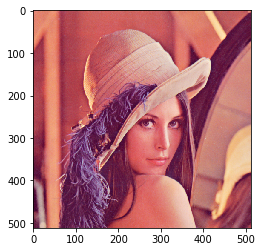

In [3]:
img = plt.imread('lenna.jpg')
plt.imshow(img)

Acima temos a nossa imagem de testes. O método [imread()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imread.html) é responsável por carregar uma imagem que está no disco para uma variável na memória. Podemos analisar a forma que essa imagem é representada através do atributo [shape](https://docs.scipy.org/doc/numpy-1.14.5/reference/generated/numpy.ndarray.shape.html).

O atributo shape está disponível para qualquer elemento do tipo ndarray (uma array do numpy). A matriz é um vetor de vetores, logo também possui esse atributo.

In [4]:
img.shape

(512, 512, 3)

O atributo shape nos retorna uma n-tupla, onde os nosso elementos são arranjados da seguinte forma:

(largura, altura, profundidade)

A largura e a altura são a própria largura e altura da imagem, e a profundidade nos diz a quantidade de canais de cor que está sendo usado nessa imagem. Nesse caso temos 3 canais, pois trabalhamos com uma imagem RGB.

Podemos ver a contribuição de cada canal ao mostrarmos a imagem isolando cada um dos 3 canais da profundidade:

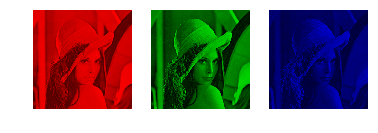

In [12]:
figure, plots = plt.subplots(ncols=3, nrows=1)
for i, subplot in zip(range(3), plots):
    temp = np.zeros((512, 512, 3), dtype='uint8')
    temp[:,:,i] = img[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

Podemos acessar as informações da imagem como fazemos acesso de matrizes, assim como também podemos manipular as imagens com técnicas de manipulação de matrizes.

Por exemplo: quais são os valores RGB no pixel (100, 100)?

In [14]:
r, g, b = img[100, 100]
print("Valor de R: %d\nValor de G: %d\nValor de B: %d\n" % (r, g, b))

Valor de R: 178
Valor de G: 68
Valor de B: 78



O que acontece, então, se mudarmos os valores desse ponto na matriz? Mudar só um ponto não ficaria bem visível, então vamos fazer o acesso desde (0, 0) até (100, 100):

In [18]:
print(img[0:100, 0:100].shape)
img[0:100, 0:100] = (255, 255, 255)
plt.imshow(img)

(100, 100, 3)


ValueError: assignment destination is read-only

Podemos ver que o código nos retornou um **ValueError** com o motivo de que a variável está definida como somente leitura. Isso é uma proteção para evitar que a imagem seja alterada acidentalmente. Note o valor de WRITEABLE na tablea abaixo:

In [24]:
img.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [25]:
img.setflags(write=1)

In [26]:
img.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

(100, 100, 3)


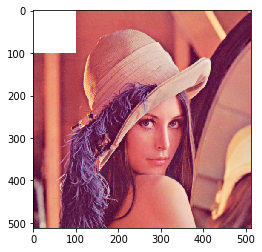

In [27]:
print(img[0:100, 0:100].shape)
img[0:100, 0:100] = (255, 255, 255)
plt.imshow(img)

Apagamos todos os pixels entre (0, 0) e (100, 100) na imagem. Qualquer pixel pode ser acessado e modificado como acessamos e modificamos elementos de matrizes comuns.